In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Load your dataset
df = pd.read_csv('Pharmaceutical Drug Spending by countries.csv')
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16


In [3]:
# dropping FLAG_CODES column as it's not relevant to our analysis
df = df.drop(columns="FLAG_CODES")
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,462.11
1,AUS,1972,15.091,0.686,36.056,475.11
2,AUS,1973,15.117,0.681,39.871,533.47
3,AUS,1974,14.771,0.755,47.559,652.65
4,AUS,1975,11.849,0.682,47.561,660.76
...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,300935.91
1032,USA,2012,11.459,1.874,964.237,302768.85
1033,USA,2013,11.384,1.858,980.864,310154.01
1034,USA,2014,11.968,1.981,1081.402,344495.16


Clustering all countries over all years using 3 variables (PC_HEALTHXP, PC_GDP, USD_CAP)

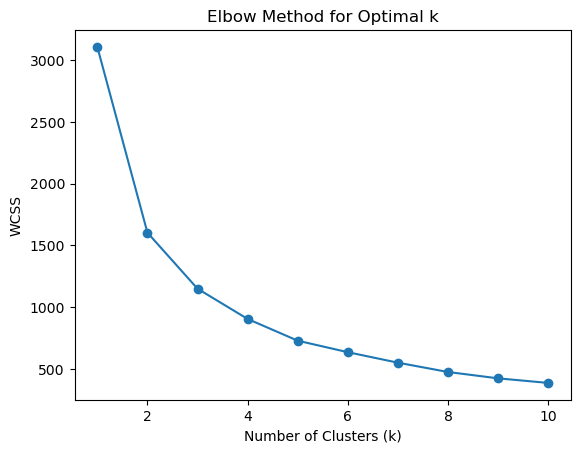

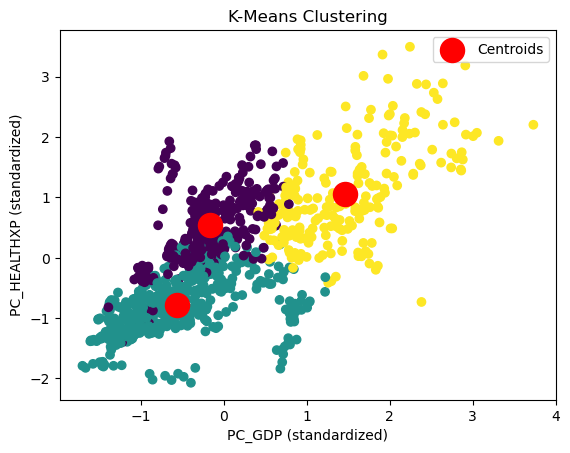

In [4]:
# Select relevant features for clustering
X = df[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters (example with first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('PC_HEALTHXP (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [5]:
# Assuming you have already standardized the features and performed K-Means clustering
# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_
df


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,Cluster
0,AUS,1971,15.992,0.727,35.720,462.11,1
1,AUS,1972,15.091,0.686,36.056,475.11,1
2,AUS,1973,15.117,0.681,39.871,533.47,1
3,AUS,1974,14.771,0.755,47.559,652.65,1
4,AUS,1975,11.849,0.682,47.561,660.76,1
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,300935.91,0
1032,USA,2012,11.459,1.874,964.237,302768.85,0
1033,USA,2013,11.384,1.858,980.864,310154.01,0
1034,USA,2014,11.968,1.981,1081.402,344495.16,0


In [6]:
print(df.groupby('Cluster')['LOCATION'].count())

Cluster
0    291
1    514
2    231
Name: LOCATION, dtype: int64


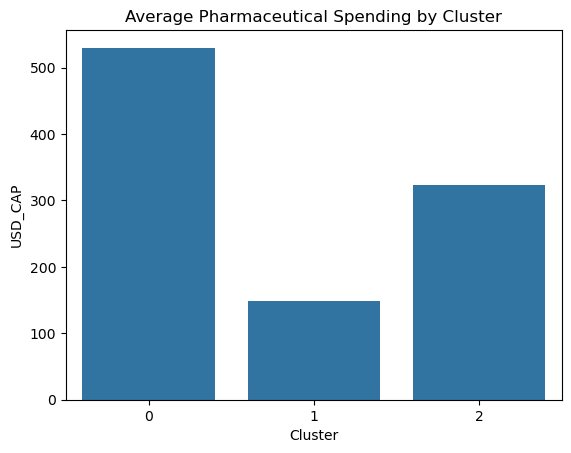

In [7]:
# Group by cluster and calculate the average USD_CAP
total_spend_by_cluster = df.groupby('Cluster')['USD_CAP'].mean().reset_index()

# Create a bar plot of the average USD_CAP by Cluster
sns.barplot(x='Cluster', y='USD_CAP', data=total_spend_by_cluster)
plt.title('Average Pharmaceutical Spending by Cluster')
plt.show()


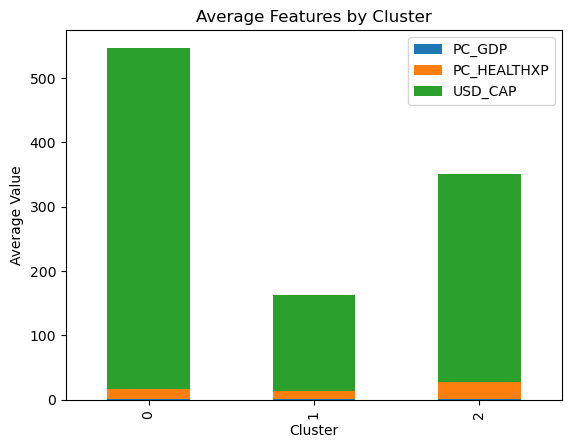

In [8]:
# Group by cluster and calculate the average of the features
avg_features_by_cluster = df.groupby('Cluster')[['PC_GDP', 'PC_HEALTHXP', 'USD_CAP']].mean().reset_index()

# Create a bar plot of the average of PC_GDP, PC_HEALTHXP, and USD_CAP by Cluster
avg_features_by_cluster.plot(x='Cluster', kind='bar', stacked=True)
plt.title('Average Features by Cluster')
plt.ylabel('Average Value')
plt.show()


In [9]:
avg_features_by_cluster

,Cluster,PC_GDP,PC_HEALTHXP,USD_CAP
0,0,1.423179,15.320069,529.958660
1,1,0.804961,12.805181,149.156864
2,2,1.667563,25.787580,323.740619


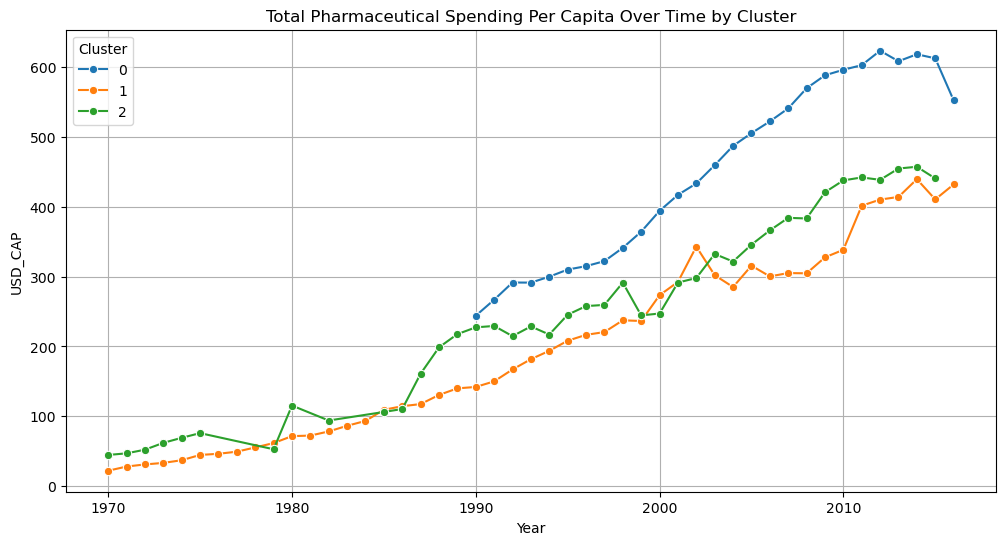

In [10]:
# Group by Cluster and TIME to calculate the mean values over time
cluster_time_trends = df.groupby(['Cluster', 'TIME'])[['TOTAL_SPEND', 'PC_GDP', 'PC_HEALTHXP', 'USD_CAP']].mean().reset_index()

# Line plot for USD_CAP over time by Cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=cluster_time_trends, x='TIME', y='USD_CAP', hue='Cluster', marker='o', palette='tab10')
plt.title('Total Pharmaceutical Spending Per Capita Over Time by Cluster')
plt.xlabel('Year')
plt.ylabel('USD_CAP')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


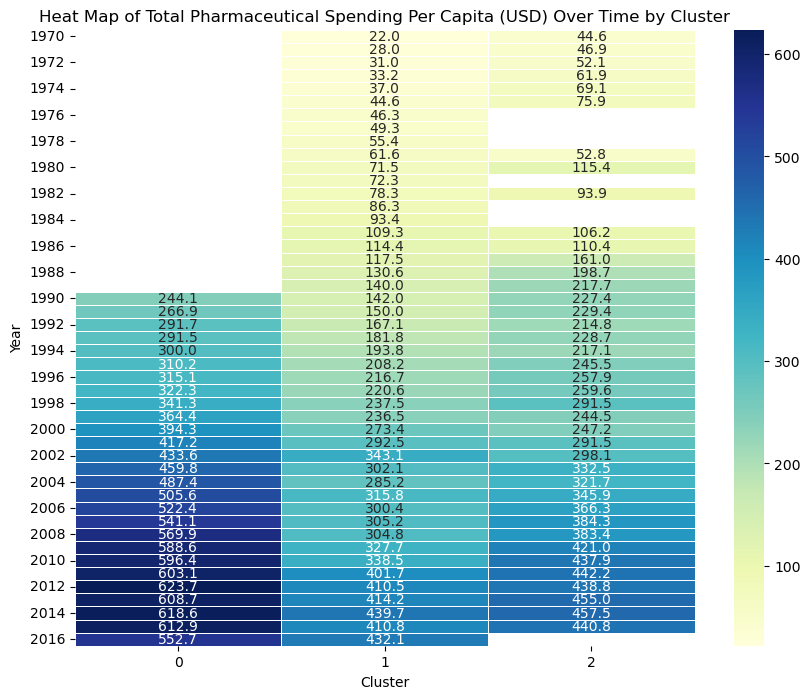

In [11]:
# Pivot the data for a heat map
heatmap_data = cluster_time_trends.pivot(index='TIME', columns='Cluster', values='USD_CAP')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heat Map of Total Pharmaceutical Spending Per Capita (USD) Over Time by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.show()


Clustering all countries over all years using 2 variables (PC_HEALTHXP, PC_GDP)

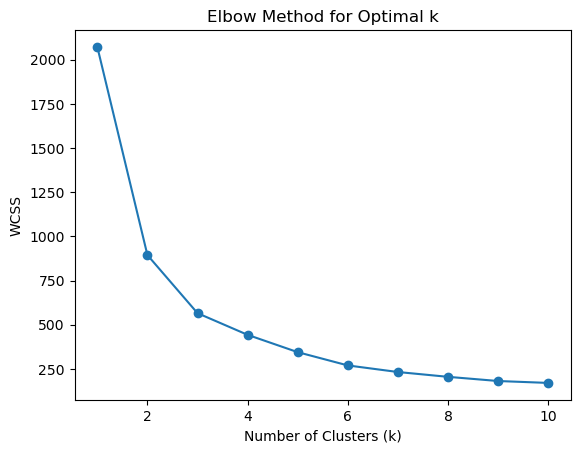

In [12]:
# Select relevant features for clustering
X = df[['PC_HEALTHXP', 'PC_GDP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

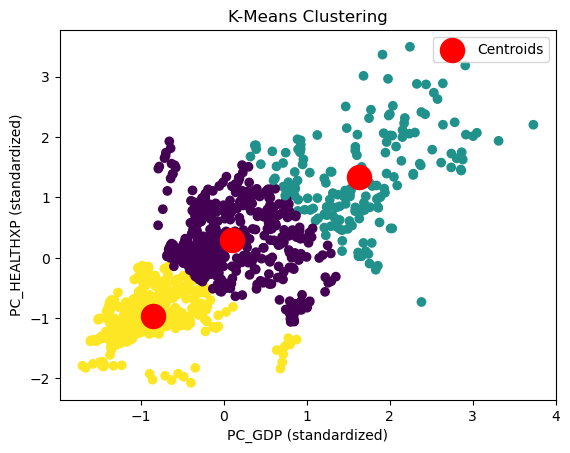

In [13]:
# Fit K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters (example with first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('PC_HEALTHXP (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Clustering all countries over all years using 2 variables (PC_GDP, USD_CAP)

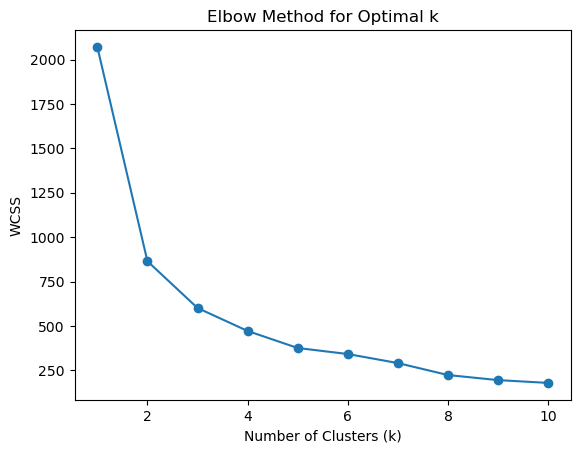

In [14]:
X = df[['PC_GDP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

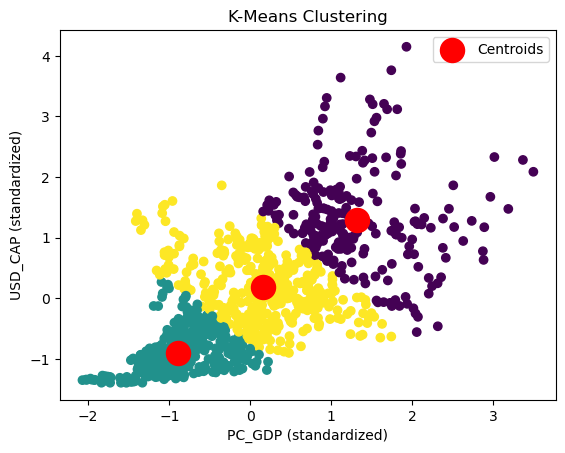

In [15]:
# Fit K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters (example with first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('USD_CAP (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Clustering all countries over all years using 2 variables (PC_HEALTHXP, USD_CAP)

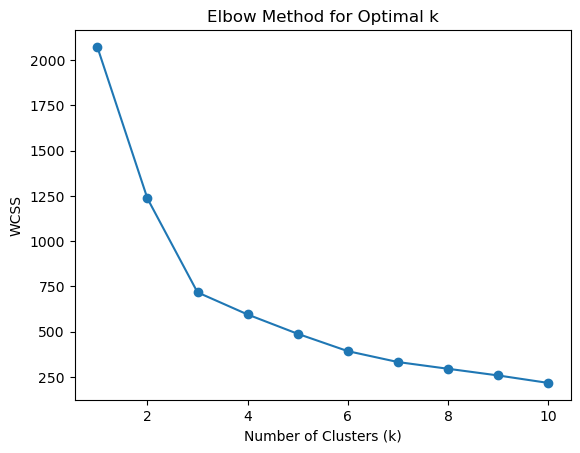

In [16]:
X = df[['PC_HEALTHXP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

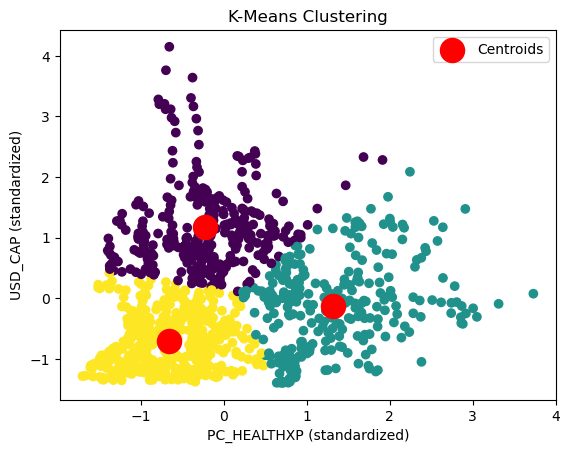

In [17]:
# Fit K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters (example with first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_HEALTHXP (standardized)')
plt.ylabel('USD_CAP (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Clustering all countries over all years using all 4 variables (PC_HEALTHXP, PC_GDP, USD_CAP, TOTAL_SPEND)

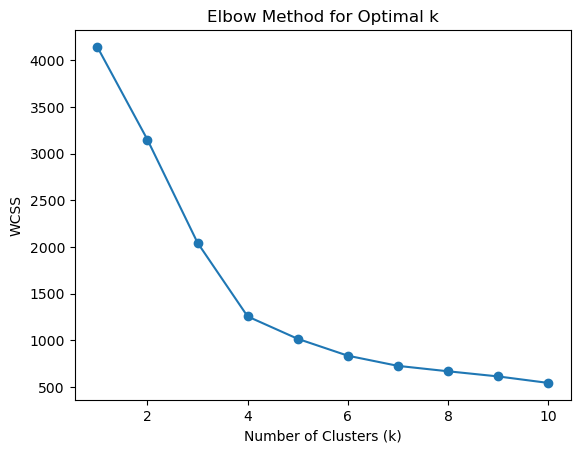

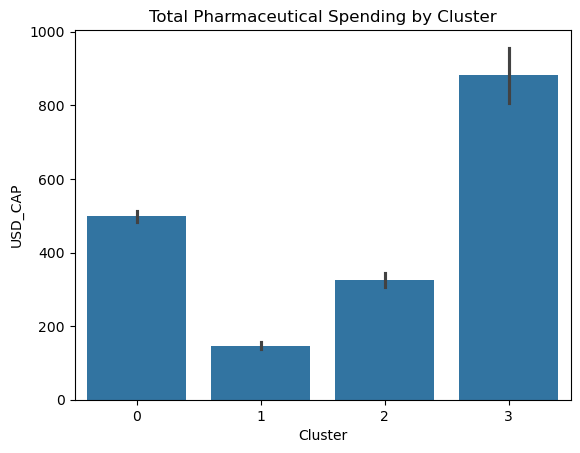

In [18]:
# Select relevant features for clustering
X = df[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-Means with the chosen number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df

import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of USD_CAP by cluster
sns.barplot(x='Cluster', y='USD_CAP', data=df)
plt.title('Total Pharmaceutical Spending by Cluster')
plt.show()

Applying Principal Component Analysis (PCA) to clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components and clusters to DataFrame for easier plotting
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the PCA components with clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters visualized with PCA')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import seaborn as sns

# Plot PC_GDP vs TOTAL_SPEND by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC_GDP', y='TOTAL_SPEND', hue='Cluster', data=df, palette='viridis', marker='o')
plt.title('PC_GDP vs TOTAL_SPEND by Cluster')
plt.show()

# Plot PC_HEALTHXP vs USD_CAP by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC_HEALTHXP', y='USD_CAP', hue='Cluster', data=df, palette='viridis', marker='o')
plt.title('PC_HEALTHXP vs USD_CAP by Cluster')
plt.show()


In [ ]:
# Making 3D visualization

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using three features, color-coded by cluster
scatter = ax.scatter(df['PC_GDP'], df['PC_HEALTHXP'], df['USD_CAP'], c=df['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC_GDP')
ax.set_ylabel('PC_HEALTHXP')
ax.set_zlabel('USD_CAP')
plt.title('3D Cluster Visualization')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
# Box plot of USD_CAP by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='USD_CAP', data=df, palette='viridis')
plt.title('Total Pharmaceutical Spending by Cluster')
plt.show()


Using Adrienne's code to find the countries with the most amount of data points from 2005-2014 and filling in missing values

In [22]:
# Reload your dataset
df = pd.read_csv('Pharmaceutical Drug Spending by countries.csv')
# dropping FLAG_CODES column as it's not relevant to our analysis
df = df.drop(columns="FLAG_CODES")
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,462.11
1,AUS,1972,15.091,0.686,36.056,475.11
2,AUS,1973,15.117,0.681,39.871,533.47
3,AUS,1974,14.771,0.755,47.559,652.65
4,AUS,1975,11.849,0.682,47.561,660.76
...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,300935.91
1032,USA,2012,11.459,1.874,964.237,302768.85
1033,USA,2013,11.384,1.858,980.864,310154.01
1034,USA,2014,11.968,1.981,1081.402,344495.16


In [ ]:
# Create a pivot table with countries as rows and years as columns
pivot_table = df.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]
pivot_table_sorted

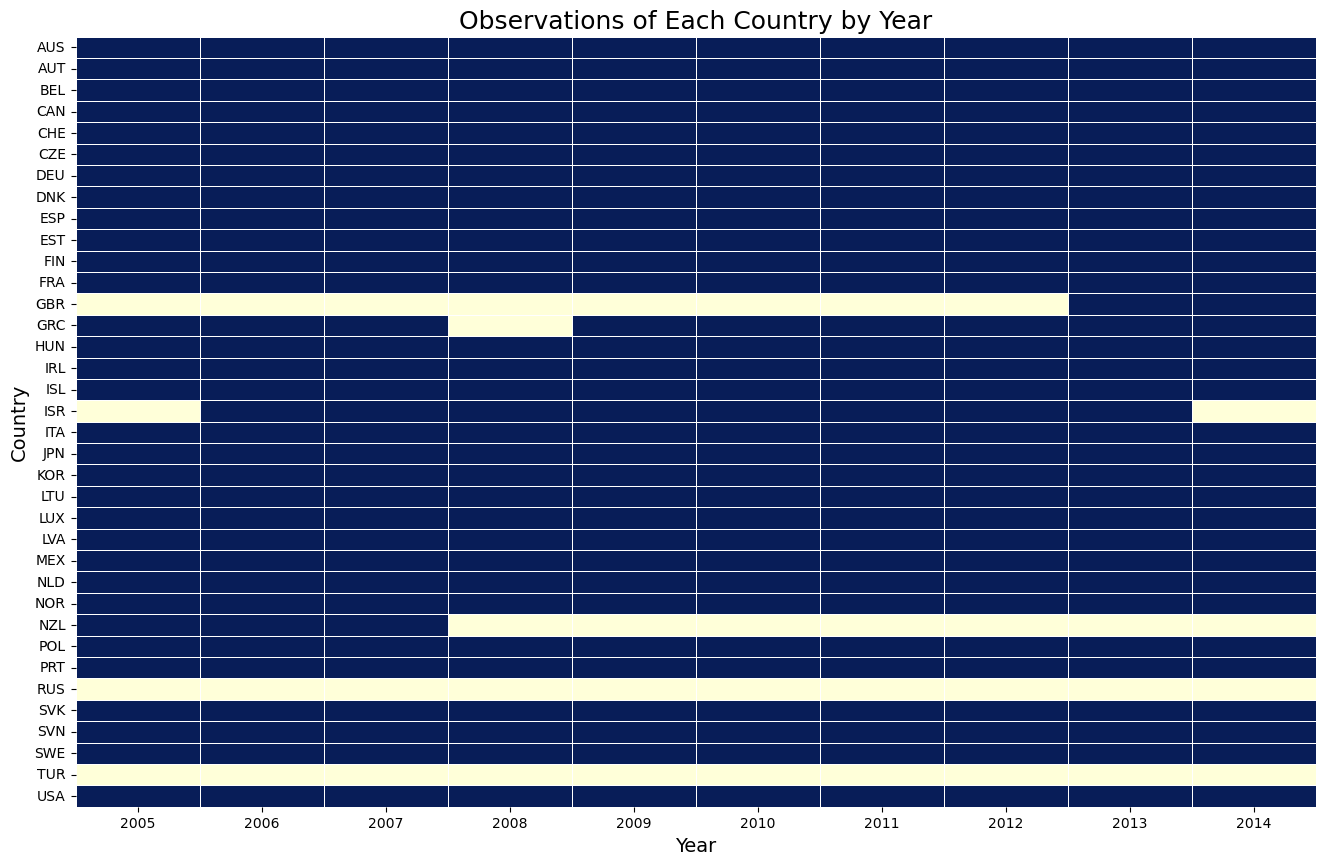

In [24]:
# Filtering for years 2005 to 2014
pivot_table_filtered = pivot_table.loc[:, 2005:2014]

# Plot the heatmap
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(pivot_table_filtered, cmap="YlGnBu", cbar=False, linewidths=.5)

# Add labels and title
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Observations of Each Country by Year', fontsize=18)

# Display the heatmap
plt.show()

In [27]:
# Define the years and excluded countries
years = pd.Series(range(2005, 2015), name="TIME")
locations = df["LOCATION"].drop_duplicates()
excluded_countries = ['GBR', 'ISR', 'NZL', 'RUS', 'TUR']
locations = locations[~locations.isin(excluded_countries)]

# Create all combinations of LOCATION and TIME
all_combinations = pd.merge(locations, years, how="cross")

# Merge with the original df to include only existing data
df_decade_complete = pd.merge(
    all_combinations,
    df,
    on=["LOCATION", "TIME"],
    how="left"
)

# Result: All combinations with missing data as NaNs
df_decade_complete


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,2005,15.218,1.213,432.513,8821.02
1,AUS,2006,15.276,1.219,461.821,9558.72
2,AUS,2007,15.201,1.225,485.887,10119.86
3,AUS,2008,15.412,1.273,510.172,10840.75
4,AUS,2009,15.535,1.334,553.724,12011.21
...,...,...,...,...,...,...
305,USA,2010,11.938,1.957,946.859,292909.12
306,USA,2011,11.855,1.939,965.580,300935.91
307,USA,2012,11.459,1.874,964.237,302768.85
308,USA,2013,11.384,1.858,980.864,310154.01


In [28]:
df_decade_complete['LOCATION'].nunique()

31

In [29]:
# Summary of missing values
missing_summary = df_decade_complete.isnull().sum()
print(missing_summary[missing_summary > 0])

# Sort by 'LOCATION' and 'TIME' to ensure proper order for forward filling
df_decade_complete = df_decade_complete.sort_values(by=['LOCATION', 'TIME'])
columns_to_fill = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
df_decade_complete[columns_to_fill] = (
    df_decade_complete.groupby('LOCATION')[columns_to_fill].ffill()
)

PC_HEALTHXP    1
PC_GDP         1
USD_CAP        1
TOTAL_SPEND    1
dtype: int64


In [30]:
# Confirm there are no more missing values
print(df_decade_complete[columns_to_fill].isnull().sum())

PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64


In [ ]:
# # Export df_decade_complete to a CSV file
# df_decade_complete.to_csv("Pharma_Spending_2005_2014.csv", index=False)

1. Clustering df_decade_complete with 3 variables (PC_HEALTHXP, PC_GDP, USD_CAP)

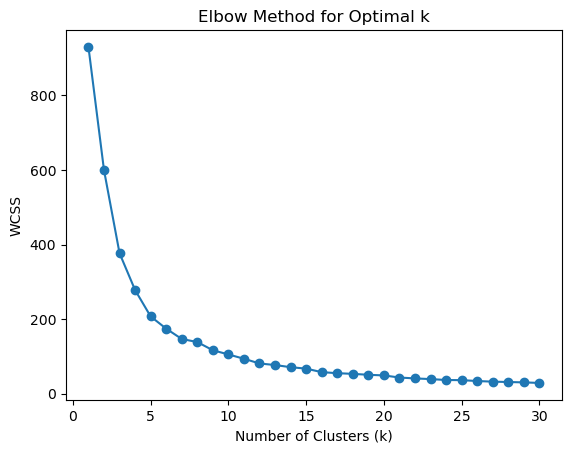

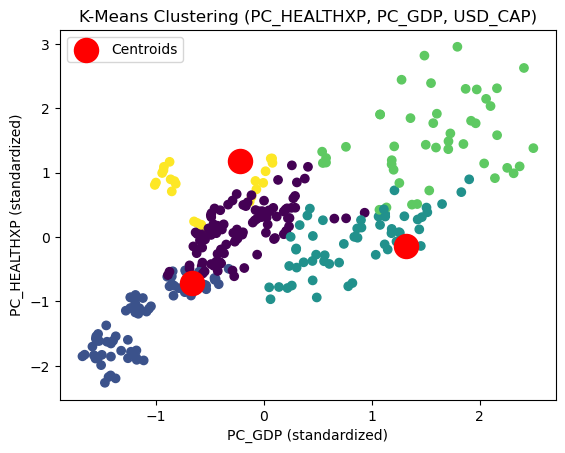

In [31]:
# Select relevant features for clustering
X = df_decade_complete[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 31): # 31 countries in total
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Create a DataFrame for WCSS values and print
# wcss_df = pd.DataFrame({'Number of Clusters': range(1, 31), 'WCSS': wcss})
# print(wcss_df)

# Plot the WCSS to find the elbow
plt.plot(range(1, 31), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()  

# Step 3: Fit K-Means with the chosen number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_decade_complete['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids1 = kmeans.cluster_centers_

# Plot clusters in 2D (PC_GDP and PC_HEALTHXP for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_decade_complete['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('PC_HEALTHXP (standardized)')
plt.title('K-Means Clustering (PC_HEALTHXP, PC_GDP, USD_CAP)')
plt.legend()
plt.show()

# # Plot clusters in 3D (PC_GDP, PC_HEALTHXP, USD_CAP)
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection='3d')
# # Plot the clusters
# ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=df_decade_complete['Cluster'], cmap='viridis', marker='o')
# # Plot the centroids
# ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', label='Centroids')
# # Labels
# ax.set_xlabel('PC_GDP (standardized)')
# ax.set_ylabel('PC_HEALTHXP (standardized)')
# ax.set_zlabel('USD_CAP (standardized)')
# plt.title('3D K-Means Clustering')
# plt.legend()
# plt.show()

In [32]:
# Add cluster labels to the DataFrame
df_decade_complete['Cluster'] = kmeans.labels_
df_decade_complete

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,Cluster
0,AUS,2005,15.218,1.213,432.513,8821.02,1
1,AUS,2006,15.276,1.219,461.821,9558.72,1
2,AUS,2007,15.201,1.225,485.887,10119.86,1
3,AUS,2008,15.412,1.273,510.172,10840.75,0
4,AUS,2009,15.535,1.334,553.724,12011.21,0
...,...,...,...,...,...,...,...
305,USA,2010,11.938,1.957,946.859,292909.12,4
306,USA,2011,11.855,1.939,965.580,300935.91,4
307,USA,2012,11.459,1.874,964.237,302768.85,4
308,USA,2013,11.384,1.858,980.864,310154.01,4


In [ ]:
# # Export df_decade_complete to a CSV file
# df_decade_complete.to_csv("Clustering_2005_2014 (PC_HEALTHXP, PC_GDP, USD_CAP).csv", index=False)

In [33]:
print(df_decade_complete.groupby('Cluster')['LOCATION'].count())

Cluster
0    103
1     79
2     57
3     45
4     26
Name: LOCATION, dtype: int64


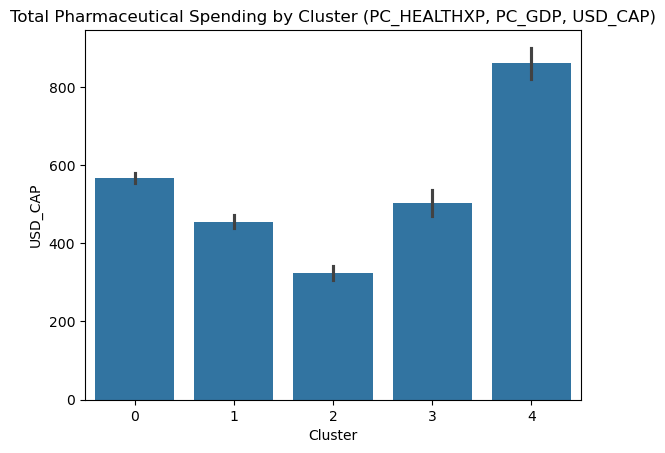

In [34]:
# Bar plot of USD_CAP by cluster
sns.barplot(x='Cluster', y='USD_CAP', data=df_decade_complete)
plt.title('Total Pharmaceutical Spending by Cluster (PC_HEALTHXP, PC_GDP, USD_CAP)')
plt.show()

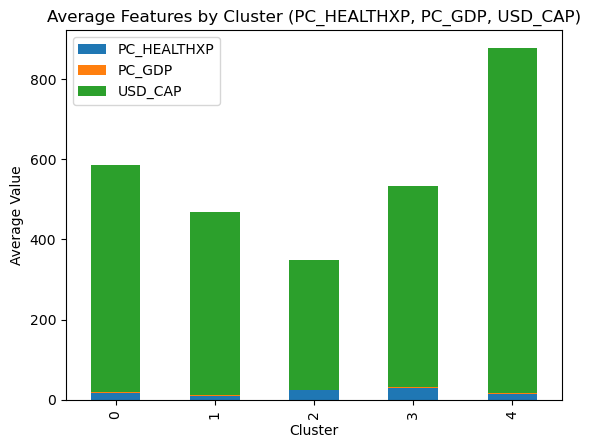

In [35]:
# Group by cluster and calculate the average of the features
avg_features_by_cluster = df_decade_complete.groupby('Cluster')[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']].mean().reset_index()

# Create a bar plot of the average of PC_HEALTHXP, PC_GDP, USD_CAP by Cluster
avg_features_by_cluster.plot(x='Cluster', kind='bar', stacked=True)
plt.title('Average Features by Cluster (PC_HEALTHXP, PC_GDP, USD_CAP)')
plt.ylabel('Average Value')
plt.show()

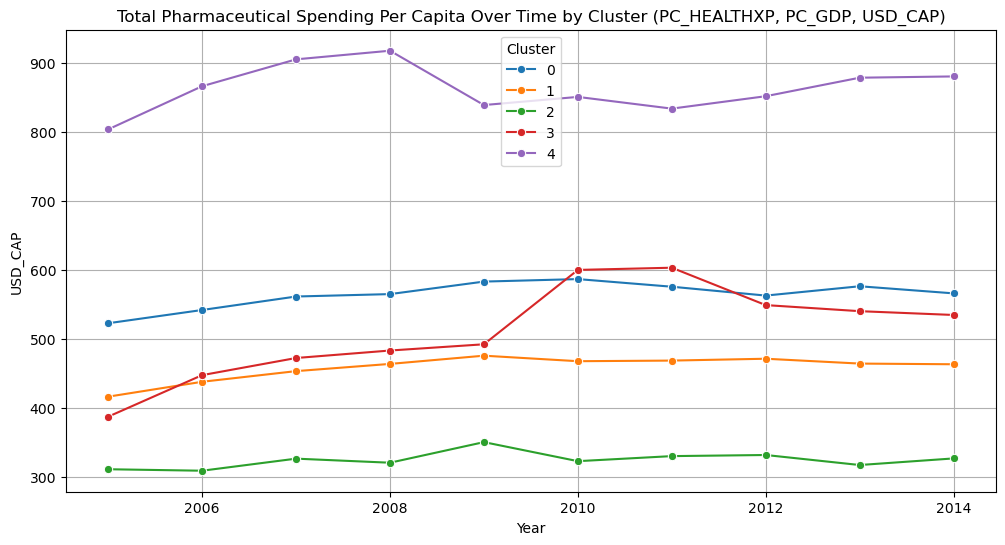

In [36]:
# Group by Cluster and TIME to calculate the mean values over time
cluster_time_trends = df_decade_complete.groupby(['Cluster', 'TIME'])[['PC_HEALTHXP', 'PC_GDP',  'USD_CAP', 'TOTAL_SPEND']].mean().reset_index()

# Line plot for USD_CAP over time by Cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=cluster_time_trends, x='TIME', y='USD_CAP', hue='Cluster', marker='o', palette='tab10')
plt.title('Total Pharmaceutical Spending Per Capita Over Time by Cluster (PC_HEALTHXP, PC_GDP, USD_CAP)')
plt.xlabel('Year')
plt.ylabel('USD_CAP')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

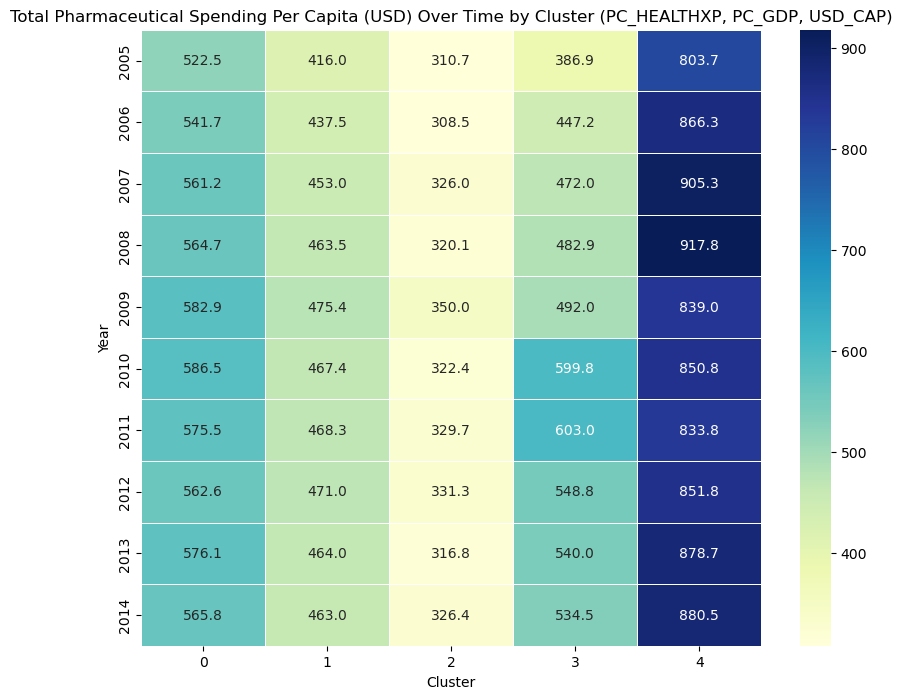

In [37]:
# Pivot the data for a heat map
heatmap_data = cluster_time_trends.pivot(index='TIME', columns='Cluster', values='USD_CAP')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Total Pharmaceutical Spending Per Capita (USD) Over Time by Cluster (PC_HEALTHXP, PC_GDP, USD_CAP)')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.show()

2. Clustering df_decade_complete with 2 variables (PC_GDP, USD_CAP)

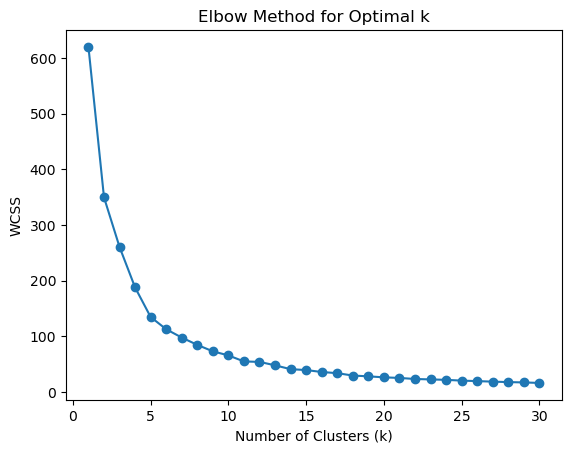

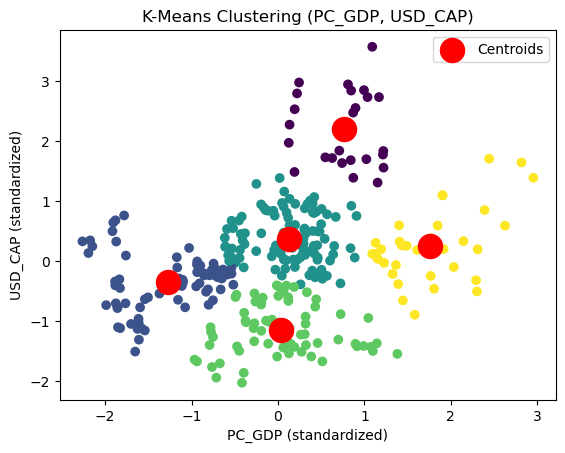

In [38]:
# Select relevant features for clustering
X = df_decade_complete[['PC_GDP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 31): # 31 countries in total
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Create a DataFrame for WCSS values and print
# wcss_df = pd.DataFrame({'Number of Clusters': range(1, 31), 'WCSS': wcss})
# print(wcss_df)

# Plot the WCSS to find the elbow
plt.plot(range(1, 31), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 3: Fit K-Means with the chosen number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_decade_complete['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters in 2D (PC_GDP and USD_CAP)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_decade_complete['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('USD_CAP (standardized)')
plt.title('K-Means Clustering (PC_GDP, USD_CAP)')
plt.legend()
plt.show()

In [39]:
# Add cluster labels to the DataFrame
df_decade_complete['Cluster'] = kmeans.labels_
df_decade_complete

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,Cluster
0,AUS,2005,15.218,1.213,432.513,8821.02,1
1,AUS,2006,15.276,1.219,461.821,9558.72,1
2,AUS,2007,15.201,1.225,485.887,10119.86,1
3,AUS,2008,15.412,1.273,510.172,10840.75,2
4,AUS,2009,15.535,1.334,553.724,12011.21,2
...,...,...,...,...,...,...,...
305,USA,2010,11.938,1.957,946.859,292909.12,0
306,USA,2011,11.855,1.939,965.580,300935.91,0
307,USA,2012,11.459,1.874,964.237,302768.85,0
308,USA,2013,11.384,1.858,980.864,310154.01,0


In [ ]:
# # Export df_decade_complete to a CSV file
# df_decade_complete.to_csv("Clustering_2005_2014 (PC_GDP, USD_CAP).csv", index=False)

In [40]:
print(df_decade_complete.groupby('Cluster')['LOCATION'].count())

Cluster
0     26
1     74
2    107
3     69
4     34
Name: LOCATION, dtype: int64


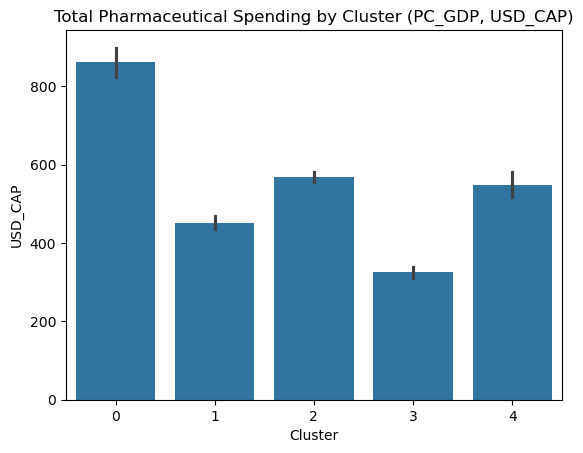

In [268]:
# Bar plot of USD_CAP by cluster
sns.barplot(x='Cluster', y='USD_CAP', data=df_decade_complete)
plt.title('Total Pharmaceutical Spending by Cluster (PC_GDP, USD_CAP)')
plt.show()

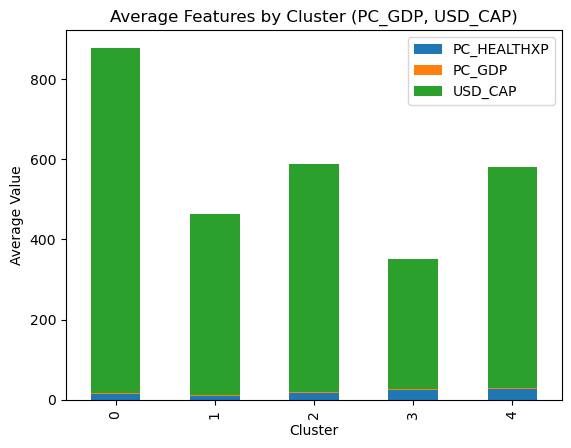

In [41]:
# Group by cluster and calculate the average of the features
avg_features_by_cluster = df_decade_complete.groupby('Cluster')[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']].mean().reset_index()

# Create a bar plot of the average of PC_HEALTHXP, PC_GDP, USD_CAP by Cluster
avg_features_by_cluster.plot(x='Cluster', kind='bar', stacked=True)
plt.title('Average Features by Cluster (PC_GDP, USD_CAP)')
plt.ylabel('Average Value')
plt.show()

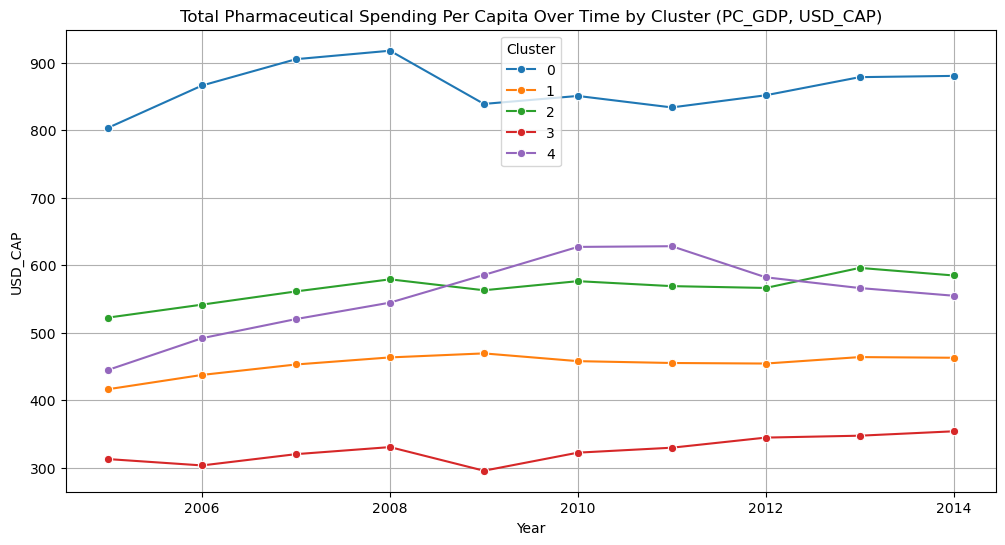

In [42]:
# Group by Cluster and TIME to calculate the mean values over time
cluster_time_trends = df_decade_complete.groupby(['Cluster', 'TIME'])[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']].mean().reset_index()

# Line plot for USD_CAP over time by Cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=cluster_time_trends, x='TIME', y='USD_CAP', hue='Cluster', marker='o', palette='tab10')
plt.title('Total Pharmaceutical Spending Per Capita Over Time by Cluster (PC_GDP, USD_CAP)')
plt.xlabel('Year')
plt.ylabel('USD_CAP')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

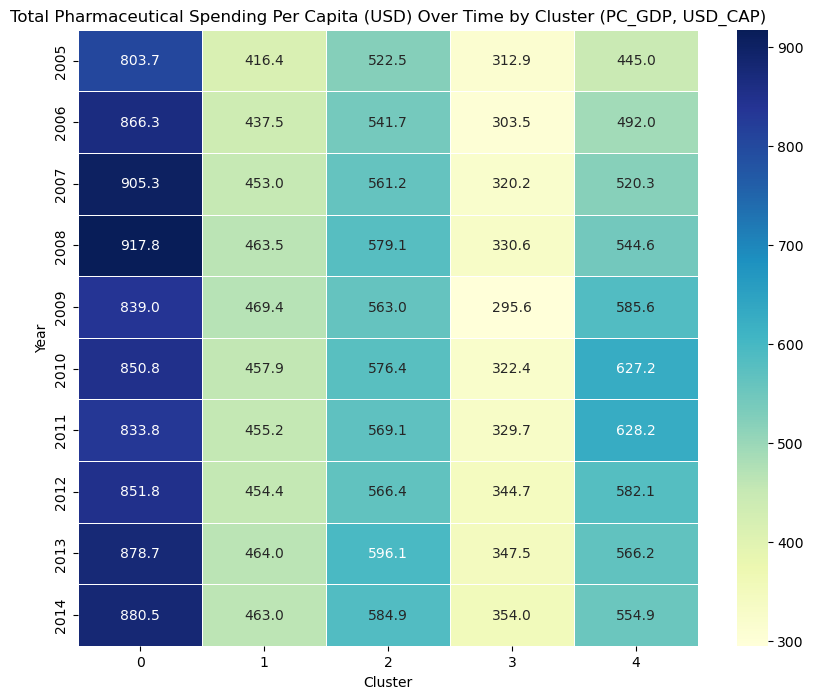

In [43]:
# Pivot the data for a heat map
heatmap_data = cluster_time_trends.pivot(index='TIME', columns='Cluster', values='USD_CAP')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Total Pharmaceutical Spending Per Capita (USD) Over Time by Cluster (PC_GDP, USD_CAP)')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.show()

3. Clustering df_decade_complete with 2 variables (PC_HEALTHXP, USD_CAP)

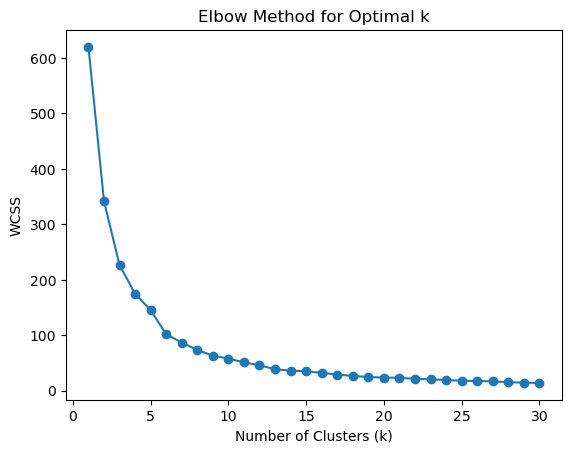

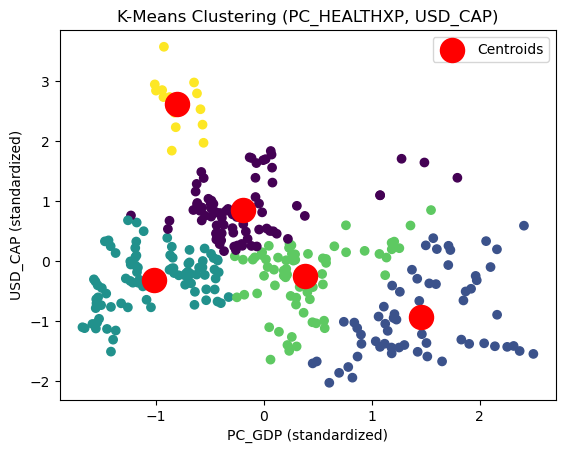

In [44]:
# Select relevant features for clustering
X = df_decade_complete[['PC_HEALTHXP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 31): # 31 countries in total
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Create a DataFrame for WCSS values and print
# wcss_df = pd.DataFrame({'Number of Clusters': range(1, 31), 'WCSS': wcss})
# print(wcss_df)

# Plot the WCSS to find the elbow
plt.plot(range(1, 31), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 3: Fit K-Means with the chosen number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_decade_complete['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters in 2D (PC_HEALTHXP, USD_CAP for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_decade_complete['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('USD_CAP (standardized)')
plt.title('K-Means Clustering (PC_HEALTHXP, USD_CAP)')
plt.legend()
plt.show()

In [45]:
# Add cluster labels to the DataFrame
df_decade_complete['Cluster'] = kmeans.labels_
df_decade_complete

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,Cluster
0,AUS,2005,15.218,1.213,432.513,8821.02,2
1,AUS,2006,15.276,1.219,461.821,9558.72,2
2,AUS,2007,15.201,1.225,485.887,10119.86,2
3,AUS,2008,15.412,1.273,510.172,10840.75,2
4,AUS,2009,15.535,1.334,553.724,12011.21,0
...,...,...,...,...,...,...,...
305,USA,2010,11.938,1.957,946.859,292909.12,4
306,USA,2011,11.855,1.939,965.580,300935.91,4
307,USA,2012,11.459,1.874,964.237,302768.85,4
308,USA,2013,11.384,1.858,980.864,310154.01,4


In [ ]:
# # Export df_decade_complete to a CSV file
# df_decade_complete.to_csv("Clustering_2005_2014 (PC_HEALTHXP, USD_CAP).csv", index=False)

In [46]:
print(df_decade_complete.groupby('Cluster')['LOCATION'].count())

Cluster
0    76
1    63
2    89
3    67
4    15
Name: LOCATION, dtype: int64


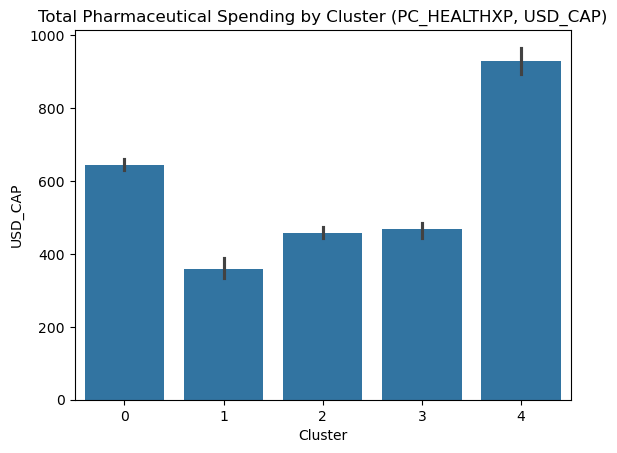

In [47]:
# Bar plot of USD_CAP by cluster
sns.barplot(x='Cluster', y='USD_CAP', data=df_decade_complete)
plt.title('Total Pharmaceutical Spending by Cluster (PC_HEALTHXP, USD_CAP)')
plt.show()

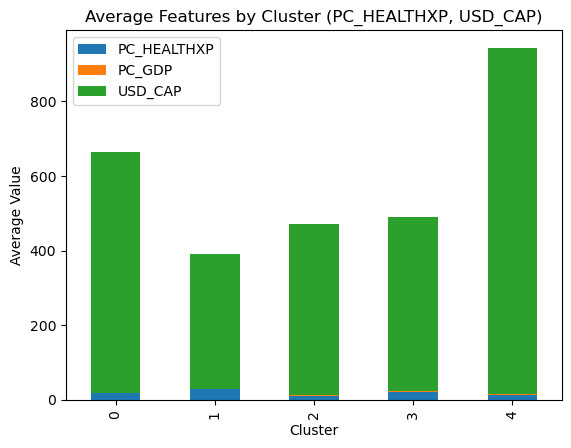

In [48]:
# Group by cluster and calculate the average of the features
avg_features_by_cluster = df_decade_complete.groupby('Cluster')[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']].mean().reset_index()

# Create a bar plot of the average of PC_HEALTHXP, PC_GDP, USD_CAP by Cluster
avg_features_by_cluster.plot(x='Cluster', kind='bar', stacked=True)
plt.title('Average Features by Cluster (PC_HEALTHXP, USD_CAP)')
plt.ylabel('Average Value')
plt.show()

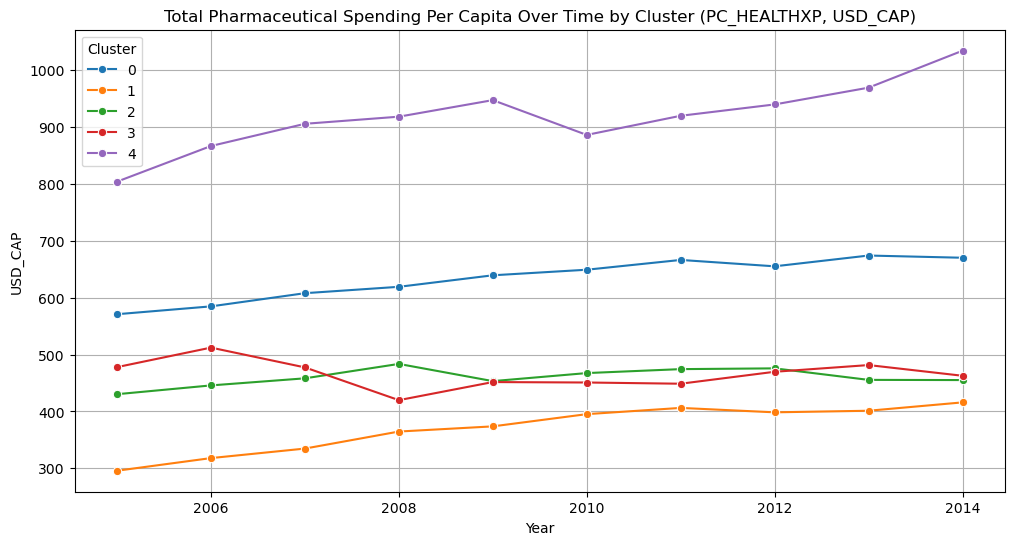

In [49]:
# Group by Cluster and TIME to calculate the mean values over time
cluster_time_trends = df_decade_complete.groupby(['Cluster', 'TIME'])[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']].mean().reset_index()

# Line plot for USD_CAP over time by Cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=cluster_time_trends, x='TIME', y='USD_CAP', hue='Cluster', marker='o', palette='tab10')
plt.title('Total Pharmaceutical Spending Per Capita Over Time by Cluster (PC_HEALTHXP, USD_CAP)')
plt.xlabel('Year')
plt.ylabel('USD_CAP')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

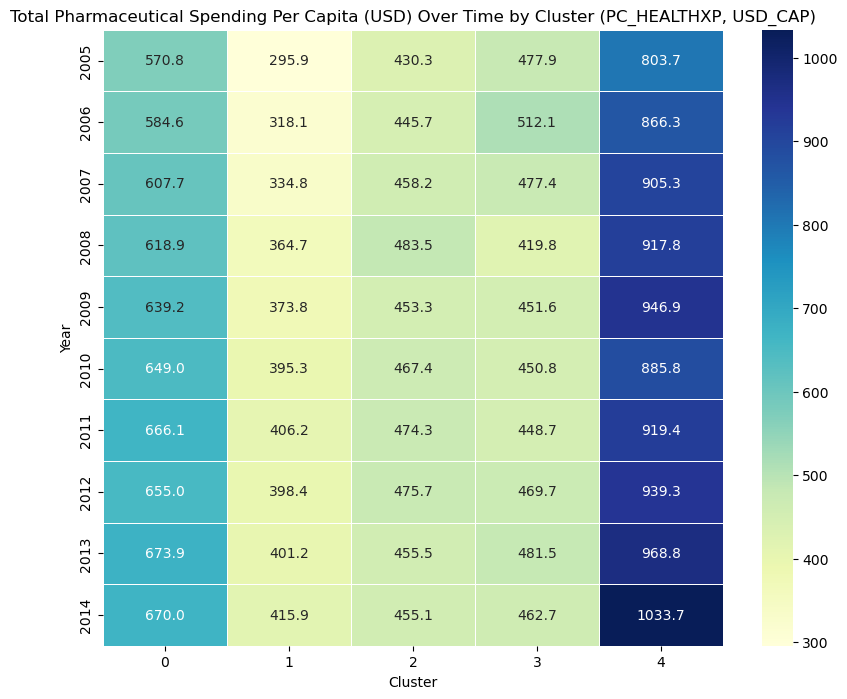

In [50]:
# Pivot the data for a heat map
heatmap_data = cluster_time_trends.pivot(index='TIME', columns='Cluster', values='USD_CAP')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Total Pharmaceutical Spending Per Capita (USD) Over Time by Cluster (PC_HEALTHXP, USD_CAP)')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.show()